In [1]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="8"
import sys
os.chdir('/home/yangk/dreidenbach/rl/molecule')
sys.path.insert(0, '/home/yangk/dreidenbach/rl/molecule/code')
sys.path.insert(0, '/home/yangk/dreidenbach/rl/molecule/code/hgraph2graph')
sys.path.insert(0, '/home/yangk/dreidenbach/rl/molecule/code/MolecularTransformer')
import pickle
%load_ext autoreload
%autoreload 2

In [40]:
import pickle
property_name = "DRD2"

with open(f"data/combo_buffer_{property_name}_discrete_exact_V3.pkl", "rb") as f:
    checked_buffer = pickle.load(f)
len(checked_buffer)

91761

In [41]:
scores = [x[-1] for x in checked_buffer]

In [62]:
with open("/home/yangk/dreidenbach/rl/molecule/data/combo_drd2_result_scores.pkl", "rb") as f:
    scores = pickle.load(f)

In [63]:
max(scores), len(scores)

(('c1ccc2c(c1)CCN2', 0.9830971458593682), 33)

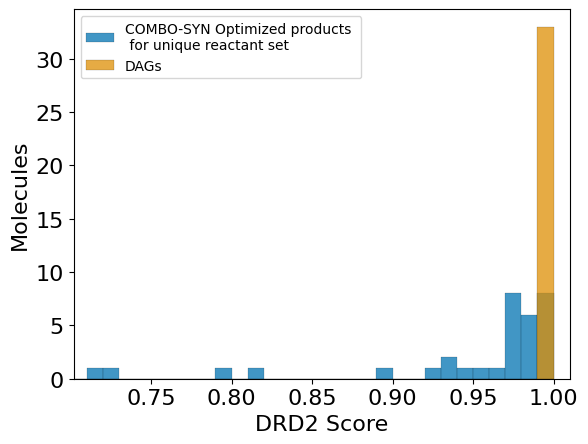

In [67]:
fig, ax = plt.subplots()

binwidth = 0.01
d = sns.histplot(data=[x[1] for x in scores], binwidth = binwidth, ax=ax, color=c[0], binrange=(0,1.0), label="COMBO-SYN Optimized products \n for unique reactant set", linewidth = 0.1)
d2 = sns.histplot(data=[0.99999]*len(scores), binwidth = binwidth, ax=ax, color=c[1], binrange=(0,1.0), label="DAGs", linewidth = 0.1)
# sns.histplot(data=Y, binwidth = binwidth, ax=ax, color=c[1], alpha=0.5, binrange=(0,1.0), label = "DAGs", linewidth = 0.1)
ax.set(xlabel=f'{property_name} Score', ylabel='Molecules')
ax.set_xlim(min([x[1] for x in scores])-binwidth, 1.0+binwidth)
# plt.axvline(max(scores), 0,0.17, label = "max")
ax.legend(fontsize = 10)

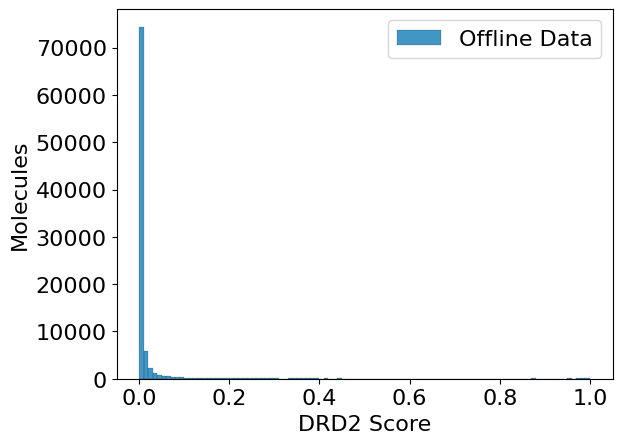

In [43]:
import matplotlib as mpl
import matplotlib.font_manager
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16
c = sns.color_palette("colorblind", 10).as_hex()



fig, ax = plt.subplots()

binwidth = 0.01
d = sns.histplot(data=scores, binwidth = binwidth, ax=ax, color=c[0], binrange=(0,1.0), label="Offline Data", linewidth = 0.1)
# sns.histplot(data=Y, binwidth = binwidth, ax=ax, color=c[1], alpha=0.5, binrange=(0,1.0), label = "DAGs", linewidth = 0.1)
ax.set(xlabel=f'{property_name} Score', ylabel='Molecules')
# ax.set_xlim(min(min(X), min(Y))-binwidth, 1.0+binwidth)
# plt.axvline(max(scores), 0,0.17, label = "max")
ax.legend()

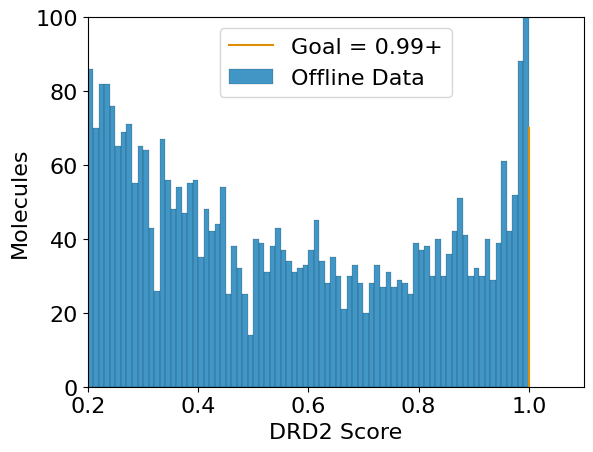

In [48]:
fig, ax = plt.subplots()

binwidth = 0.01
d = sns.histplot(data=[x for x in scores if x > 0.2 ], binwidth = binwidth, ax=ax, color=c[0], binrange=(0,1.0), label="Offline Data", linewidth = 0.1)
# sns.histplot(data=Y, binwidth = binwidth, ax=ax, color=c[1], alpha=0.5, binrange=(0,1.0), label = "DAGs", linewidth = 0.1)
ax.set(xlabel=f'{property_name} Score', ylabel='Molecules')
# plt.axvline(0.99, 0, 0.7, label = "Goal = 0.99", color=c[1])
plt.axvline(0.9999999, 0, 0.7, label = "Goal = 0.99+", color=c[1])
ax.set_ylim((0, 100))
ax.set_xlim((0.2, 1.1))
ax.legend()

In [33]:
with open(f"data/dags_buffer_list_JNK3_discrete_exact_V3.pkl", "rb") as f:
       jnk_buff_list = pickle.load(f)

In [34]:
for x in jnk_buff_list:
    print(len(x), max([y[-1] for y in x]))

19263 0.94
14972 0.86
4343 0.63


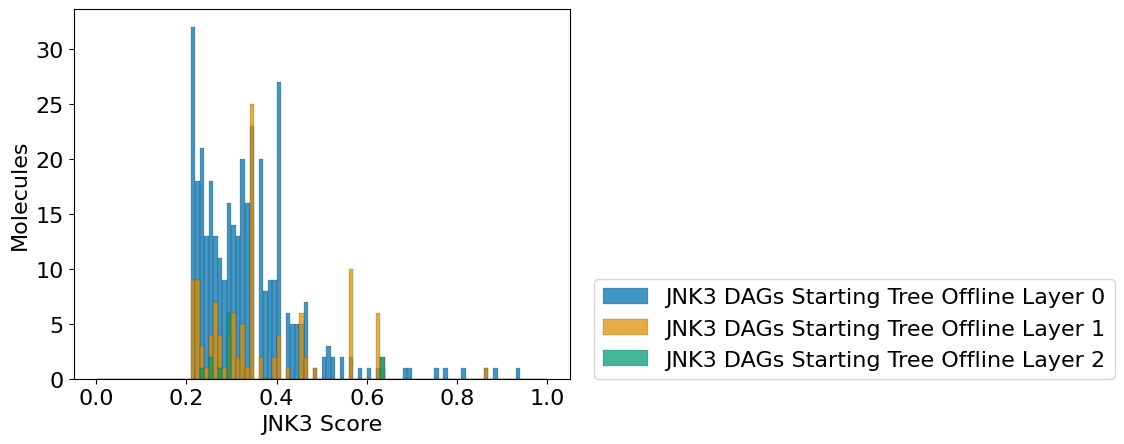

In [39]:
fig, ax = plt.subplots()
for idx, buffer in enumerate(jnk_buff_list):
    binwidth = 0.01
    scores = [x[-1] for x in buffer if x[-1] > 0.2]
    d = sns.histplot(data=scores, binwidth = binwidth, ax=ax, color=c[idx], binrange=(0,1.0), label=f"JNK3 DAGs Starting Tree Offline Layer {idx}", linewidth = 0.1)
ax.set(xlabel='JNK3 Score', ylabel='Molecules')
ax.legend(loc = (1.05, 0))